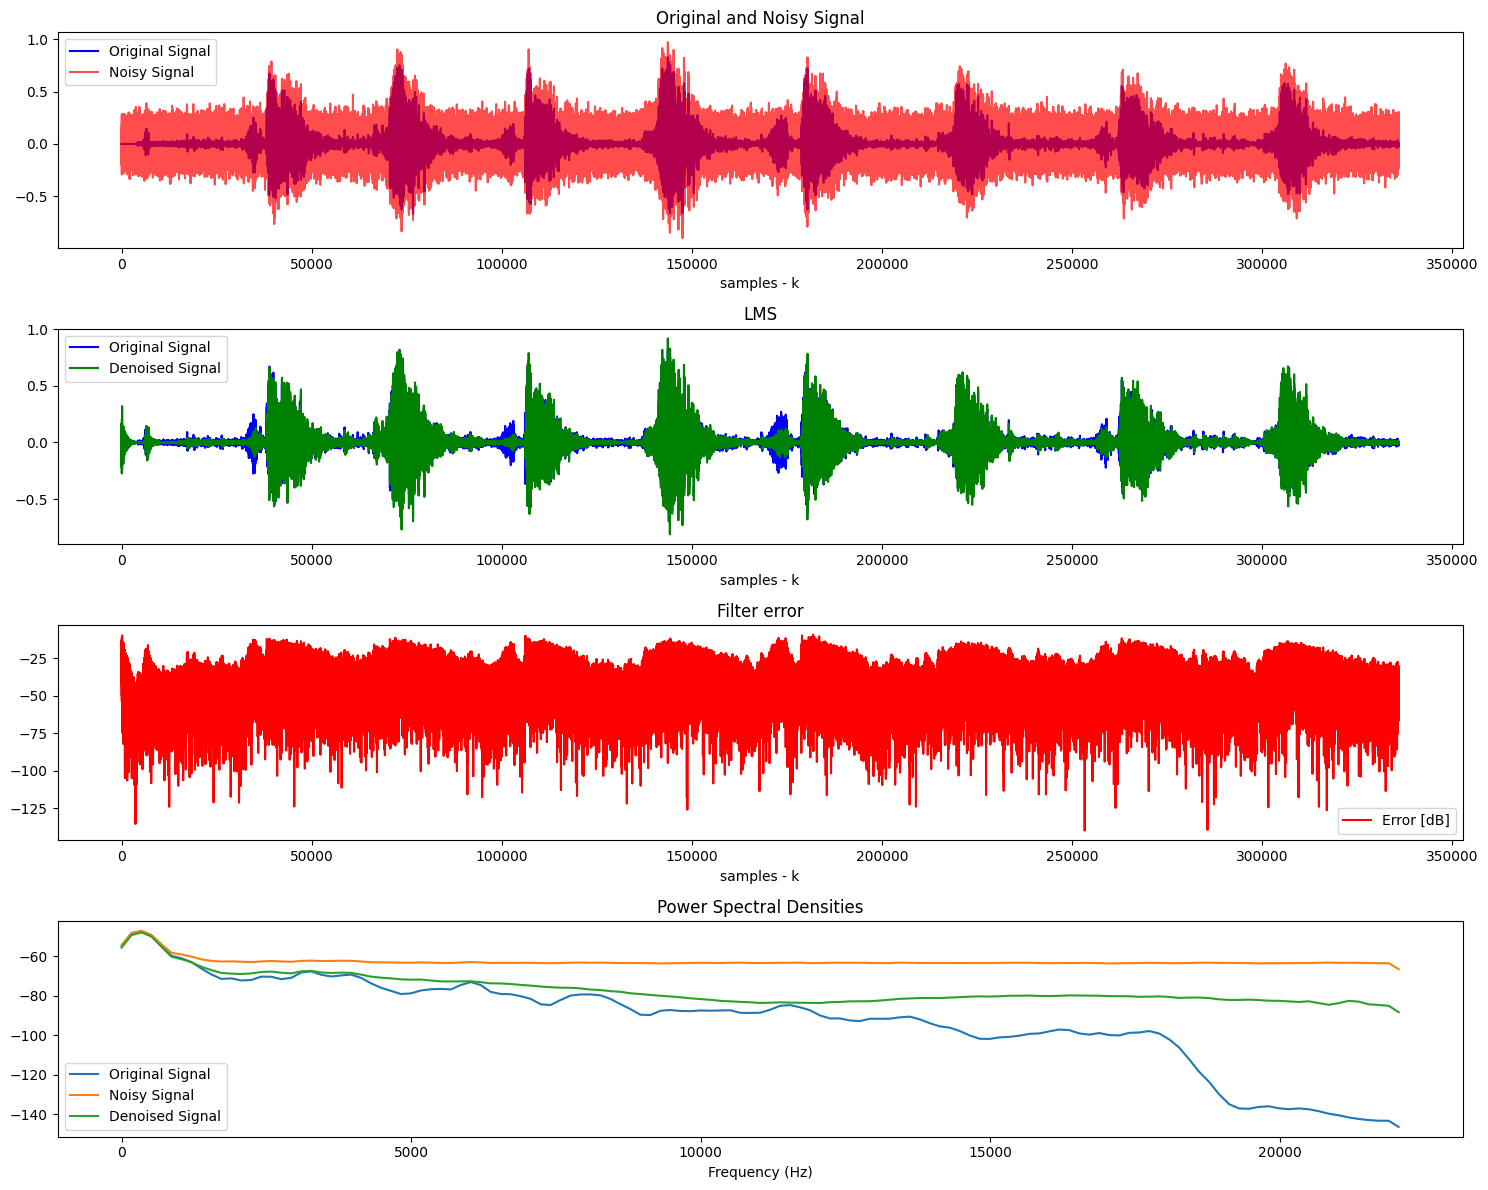

Time-domain MSE: 0.0014545112771658171
Frequency-domain MSE: 1.6139948959022107e-13
elapsed time is:
3.1830954551696777


In [2]:
# LMS Filter
import numpy as np
import matplotlib.pyplot as plt
import padasip as pa
import librosa
from scipy.signal import welch
import time
# Record the start time
start_time = time.time()
# Load the speech signal
file_path = "mono.wav"  # Replace with the actual path to your audio file
signal, sr = librosa.load(file_path, sr=None, mono=True)

# Create a noisy version of the signal
v = np.random.normal(0, 0.1, len(signal))
noisy_signal = signal + v

# Set the filter length
n = 4

# Create the input matrix
x = np.column_stack((noisy_signal[:-n], noisy_signal[n-1:-1], noisy_signal[n-2:-2], noisy_signal[n-3:-3]))

# Target signal for the filter
d = signal[n:]

# Identification
f = pa.filters.FilterLMS(n=n, mu=0.1, w="random")
y, e, w = f.run(d, x)

# Calculate time-domain MSE
mse_time_domain = np.mean(e**2)

# Calculate frequency-domain MSE using Blackman-Tukey method
frequencies, psd_original = welch(signal, fs=sr, nperseg=256, window='blackman')
frequencies, psd_noisy = welch(noisy_signal, fs=sr, nperseg=256, window='blackman')
frequencies, psd_denoised = welch(y, fs=sr, nperseg=256, window='blackman')

mse_freq_domain = np.mean((psd_original - psd_denoised)**2)

# Show results
plt.figure(figsize=(15, 12))
plt.subplot(411); plt.title("Original and Noisy Signal"); plt.xlabel("samples - k")
plt.plot(signal, "b", label="Original Signal")
plt.plot(noisy_signal, "r", alpha=0.7, label="Noisy Signal")
plt.legend()

plt.subplot(412); plt.title("LMS"); plt.xlabel("samples - k")
plt.plot(signal[n:], "b", label="Original Signal")
plt.plot(y, "g", label="Denoised Signal")
plt.legend()

plt.subplot(413); plt.title("Filter error"); plt.xlabel("samples - k")
plt.plot(10 * np.log10(e**2), "r", label="Error [dB]")
plt.legend()

plt.subplot(414); plt.title("Power Spectral Densities"); plt.xlabel("Frequency (Hz)")
plt.plot(frequencies, 10 * np.log10(psd_original), label="Original Signal")
plt.plot(frequencies, 10 * np.log10(psd_noisy), label="Noisy Signal")
plt.plot(frequencies, 10 * np.log10(psd_denoised), label="Denoised Signal")
plt.legend()

plt.tight_layout()
plt.show()

print(f"Time-domain MSE: {mse_time_domain}")
print(f"Frequency-domain MSE: {mse_freq_domain}")
# Record the end time
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"elapsed time is:")
print(elapsed_time)